# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Import the OpenWeatherMap API key
import api_keys
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}"

In [4]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
            
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dongyang
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | vila velha
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | amal
Processing Record 6 of Set 1 | sasebo
Processing Record 7 of Set 1 | beli
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | urengoy
Processing Record 10 of Set 1 | nar'yan-mar
Processing Record 11 of Set 1 | ust-nera
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | cable beach
City not found. Skipping...
Processing Record 15 of Set 1 | flying fish cove
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | gombi
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | la passe
Processing Record 22 of Set 1 | taio

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dongyang,29.2678,120.2253,42.93,53,3,5.79,CN,1699831828
1,blackmans bay,-43.0167,147.3167,61.52,49,7,6.22,AU,1699831252
2,vila velha,-20.3297,-40.2925,80.94,84,0,9.22,BR,1699831256
3,waitangi,-43.9535,-176.5597,54.57,86,56,19.37,NZ,1699831242
4,amal,59.0510,12.7049,31.39,84,25,8.39,SE,1699831829


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dongyang,29.2678,120.2253,42.93,53,3,5.79,CN,1699831828
1,blackmans bay,-43.0167,147.3167,61.52,49,7,6.22,AU,1699831252
2,vila velha,-20.3297,-40.2925,80.94,84,0,9.22,BR,1699831256
3,waitangi,-43.9535,-176.5597,54.57,86,56,19.37,NZ,1699831242
4,amal,59.0510,12.7049,31.39,84,25,8.39,SE,1699831829


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

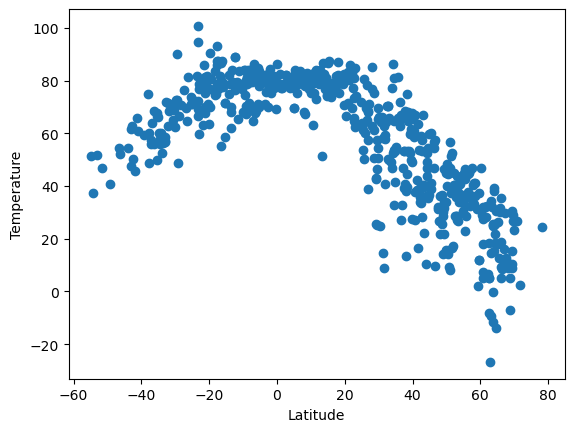

In [23]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

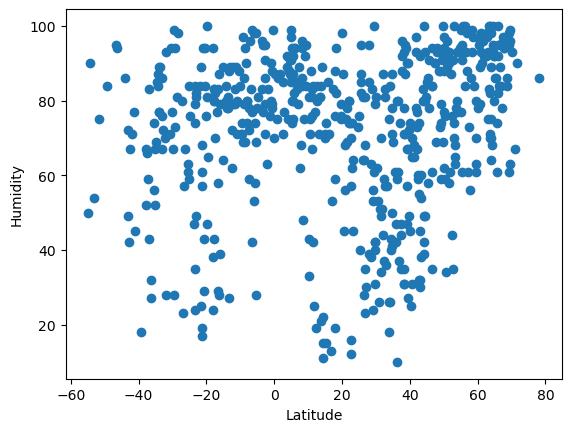

In [24]:
# Build scatter plot for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

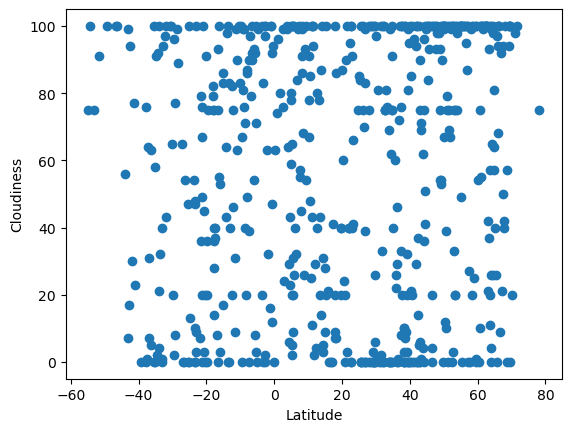

In [25]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

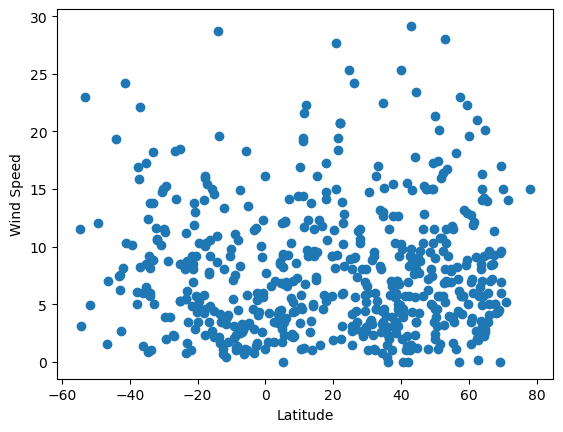

In [26]:
# Build the scatter plots for latitude vs. wind speed
_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']

plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      52.270299
1      88.744011
2      77.296479
3      89.216706
4      37.242128
         ...    
570    34.778691
571    34.871081
572    56.476928
573    54.196706
574    45.677335
Name: Lat, Length: 575, dtype: float64


In [49]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.5x +67.04


The r-value is: 0.07476278647924539


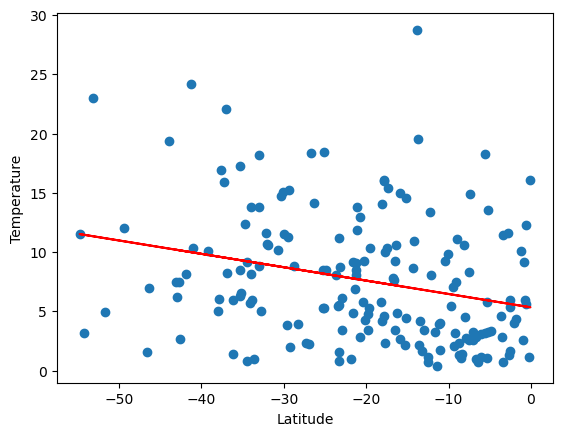

In [71]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dongyang,29.2678,120.2253,42.93,53,3,5.79,CN,1699831828
4,amal,59.0510,12.7049,31.39,84,25,8.39,SE,1699831829
5,sasebo,33.1592,129.7228,50.00,57,76,16.96,JP,1699831829
6,beli,7.8587,10.9719,78.39,68,45,2.39,NG,1699831830
7,isafjordur,66.0755,-23.1240,35.47,82,100,4.09,IS,1699831232


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,61.52,49,7,6.22,AU,1699831252
2,vila velha,-20.3297,-40.2925,80.94,84,0,9.22,BR,1699831256
3,waitangi,-43.9535,-176.5597,54.57,86,56,19.37,NZ,1699831242
12,port-aux-francais,-49.3500,70.2167,40.93,84,100,12.01,TF,1699831831
13,flying fish cove,-10.4217,105.6791,76.68,88,100,9.22,CX,1699831297


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7259346164873912


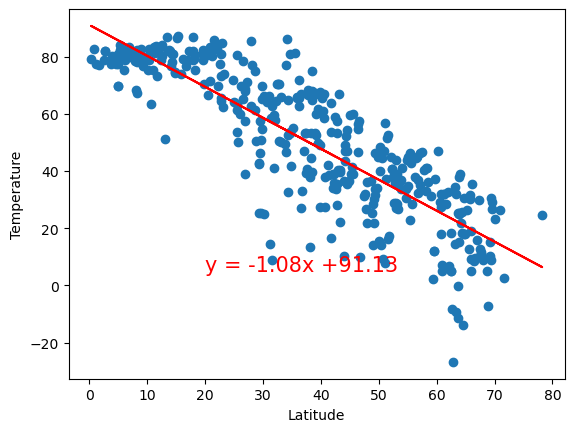

In [72]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.4729669428422933


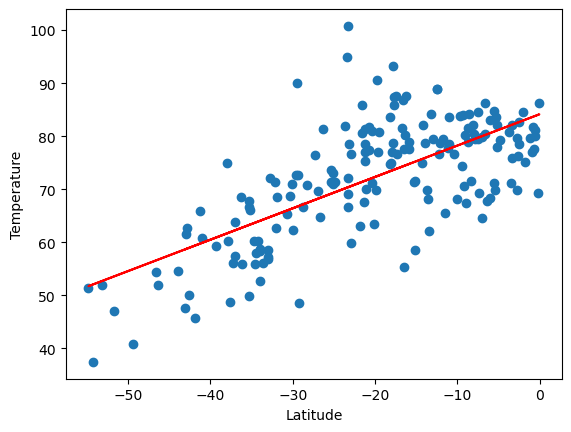

In [73]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Max temps are clearly warmer consistently closer to the equator with few outliers.  The further the distance from the equator, temperatures drop but with more variability and an increase in outliers.  Both charts demonstrate this trend, although variability appears to be greater in the southern hemisphere with more outliers. R-value shows the northern hemisphere has a higher correlation between the two variables (temp and latitude) than the southern hemisphere, but both are positive correlations.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.04691626939265007


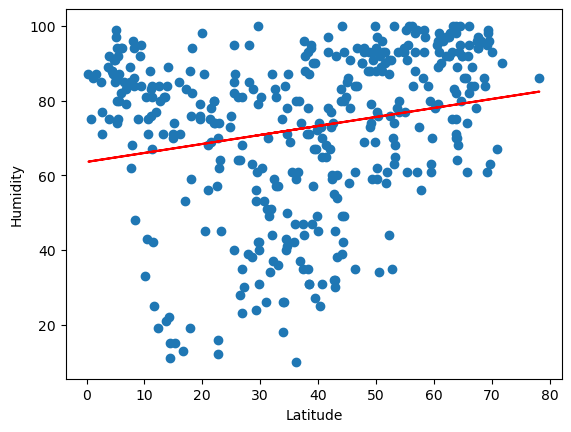

In [74]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.04262513426394067


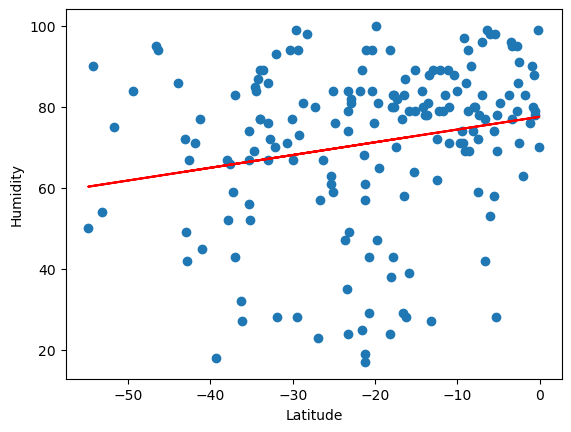

In [75]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Humidity shows great variability across the north and south hemispheres with many outliers in both directions.  The r-value shows no correlation to humidity and latitude in both hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01985448000705679


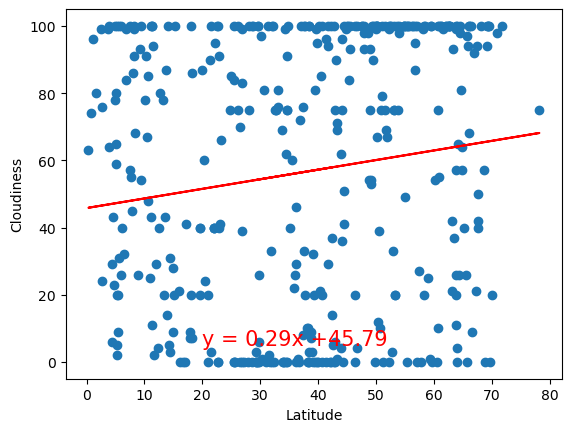

In [76]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.004374139626464261


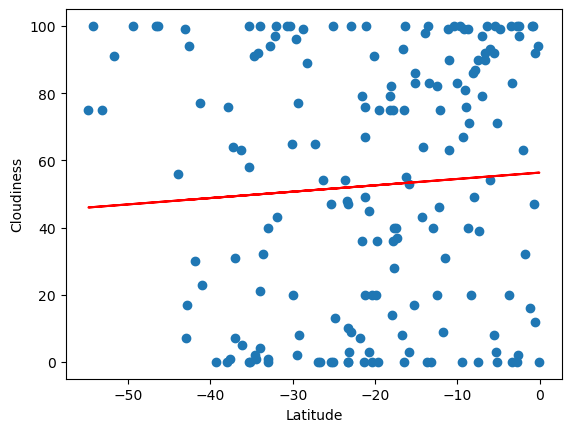

In [77]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** Cloudiness also shows great variability across the north and south hemispheres with few plots along the line of regression and many outliers in both directions.  The r-value shows no correlation between cloudiness and latitude for both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0004897402025068224


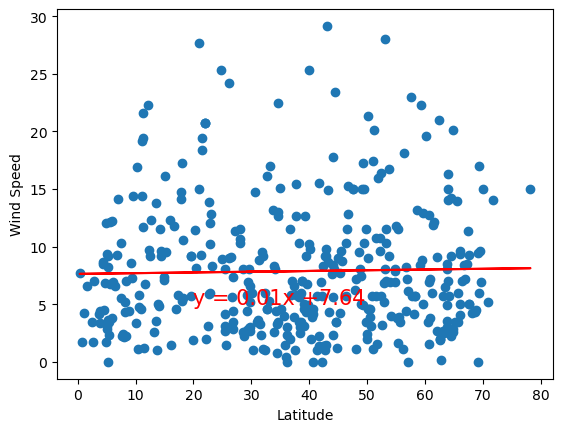

In [78]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

The r-value is: 0.07476278647924539


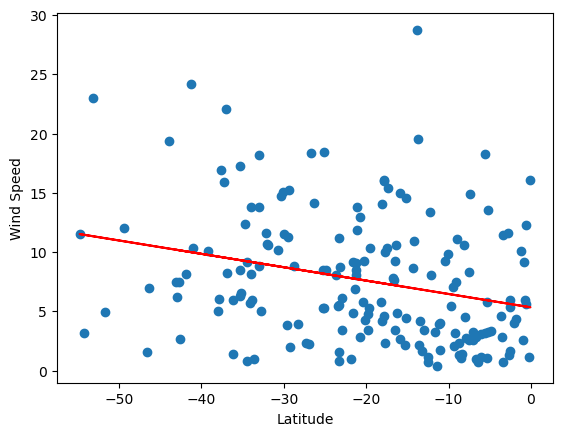

In [79]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

print(f"The r-value is: {rvalue**2}")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere, wind speed looks to be typically under 15 mph with slight variability and some outliers up to 30 mph.  The southern hemisphere shows similar results, although with fewer plots.  The r-value shows no correlation between wind speed and latitude in either hemisphere.